In [4]:
from matplotlib import pyplot as plt

In [67]:
import numpy as np
import os
import csv

In [270]:
def total_runs_scored():
    with open('data_source/deliveries.csv', 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        deliveries = []
        for i in csv_reader:
            deliveries.append(i)

    i = 0
    runs_scored = {}
    for r in deliveries:
        if i == 0:
            i += 1
        else:
            if r[2] not in runs_scored:
                runs_scored[r[2]] = int(r[17])
            else:
                runs_scored[r[2]] += int(r[17])

    x, y = zip(*runs_scored.items())
    plt.figure(figsize=(15, 10))
    plt.bar(x, y)
    plt.title("Total runs by Teams")
    plt.ylabel("Total Runs")
    plt.xlabel("Teams")
    plt.xticks(rotation = 'vertical')
    plt.savefig(os.path.join('Total runs by Teams.png'), dpi=300, format='png', bbox_inches='tight')
    plt.show()


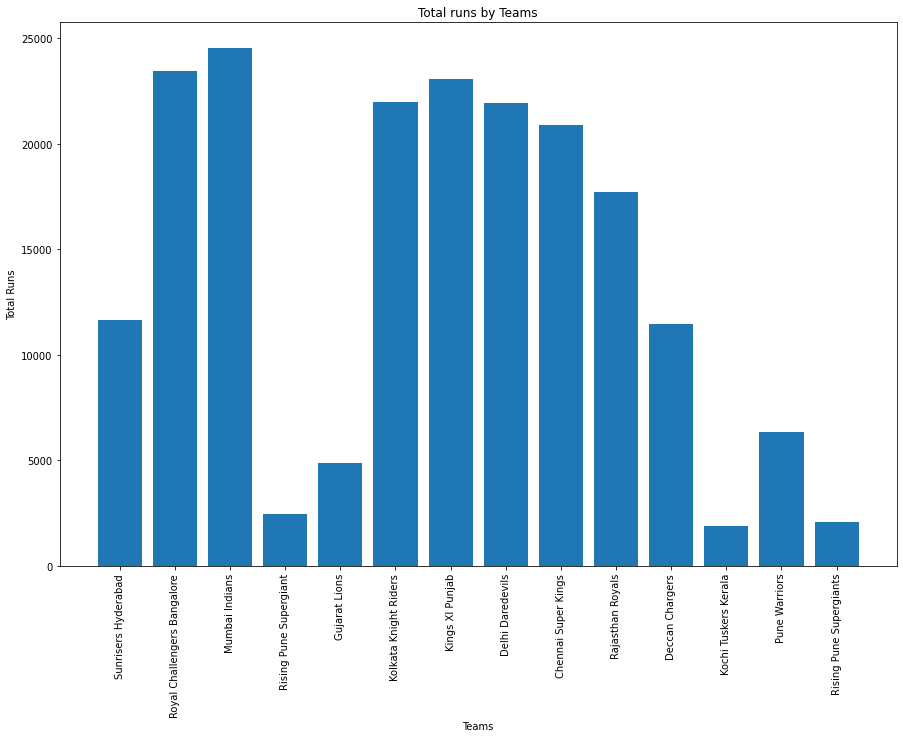

In [271]:
total_runs_scored()

In [268]:
def top_batsman_RCB():
    with open('data_source/deliveries.csv', 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        deliveries = []
        for i in csv_reader:
            deliveries.append(i)

    i = 0
    rcb_batsman = {}
    for r in deliveries:
        if i == 0:
            i += 1
        else:
            if r[2] == 'Royal Challengers Bangalore':
                if r[6] not in rcb_batsman:
                    rcb_batsman[r[6]] = int(r[15])
                else:
                    rcb_batsman[r[6]] += int(r[17])

    x, y = zip(*rcb_batsman.items())
    plt.figure(figsize=(15, 10))
    plt.plot(x, y)
    plt.title("Total runs by RCB batsman")
    plt.ylabel("Total Runs")
    plt.xlabel("Batsman")
    plt.xticks(rotation = 'vertical')
    plt.savefig(os.path.join('Total runs by RCB batsman.png'), dpi=300, format='png', bbox_inches='tight')
    plt.show()

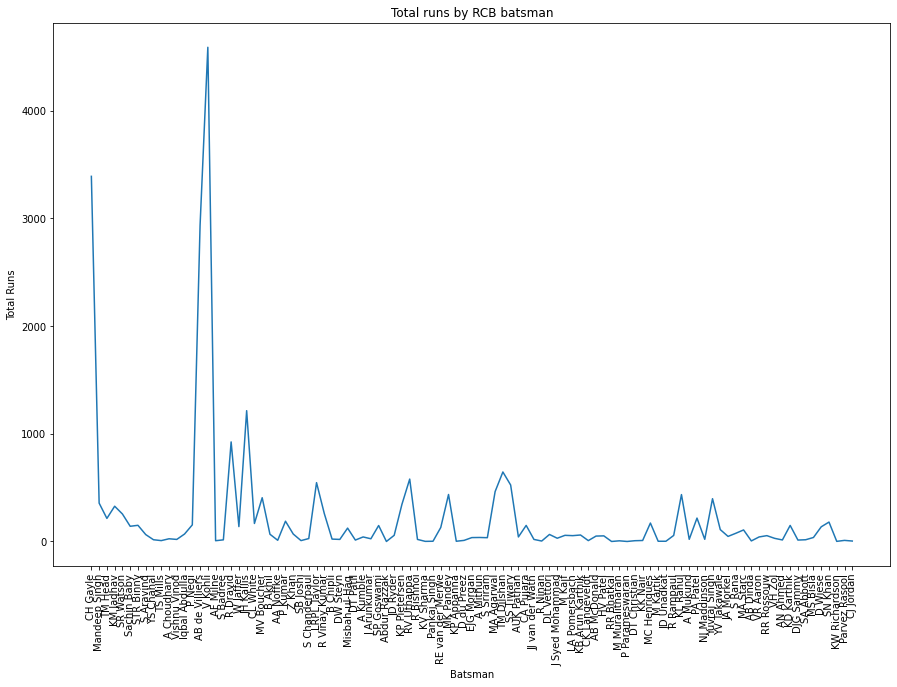

In [269]:
top_batsman_RCB()

In [264]:
def foreign_umpire():
    
    with open('data_source/umpires.csv', 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        umpires = []
        for i in csv_reader:
            umpires.append(i)
            
    u = {}
    i = 0
    for r in umpires:       
        if i == 0:
            i += 1
        else:
            if r[1] != 'India':
                if r[1] not in u:
                    u[r[1]] = 1
                else:
                    u[r[1]] += 1

    x, y = zip(*u.items())
    plt.figure(figsize=(15, 10))
    plt.bar(x, y)
    plt.title("Foreign umpire analysis")
    plt.ylabel("Count of Umpire")
    plt.xlabel("Nationality")
    plt.xticks(rotation = 'vertical')
    plt.savefig(os.path.join('Foreign umpire analysis.png'), dpi=300, format='png', bbox_inches='tight')
    plt.show()

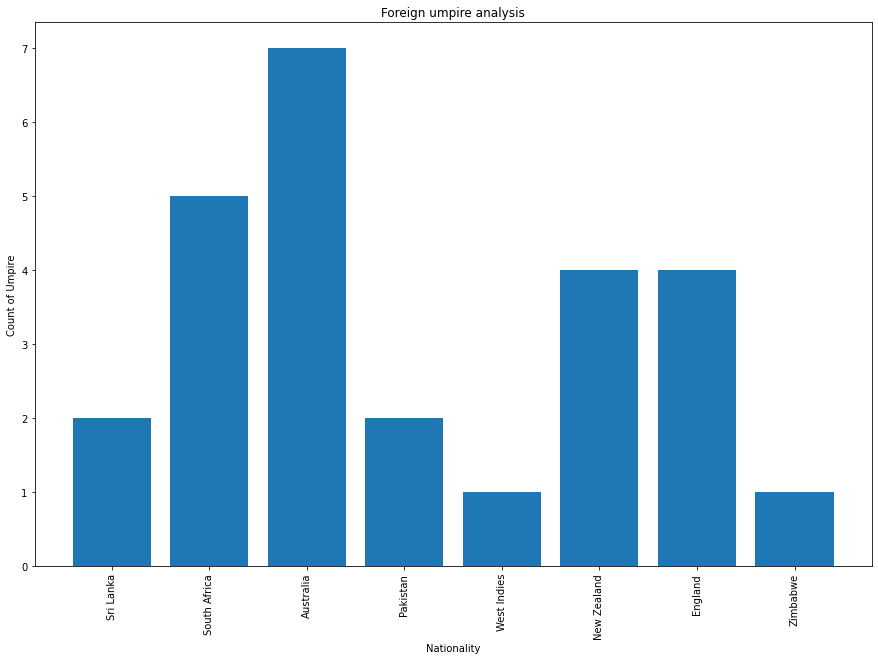

In [265]:
foreign_umpire()

In [260]:
def matches_team_season():
    with open('data_source/matches.csv', 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        matches = []
        for i in csv_reader:
            matches.append(i)
            
    with open('data_source/deliveries.csv', 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        deliveries = []
        for i in csv_reader:
            deliveries.append(i)
            
    def merge(lst1, lst2): 
        return [a + [b[1]] for (a, b) in zip(lst1, lst2)] 
    
    mergedlst = merge(deliveries,matches)
#     print(mergedlst)
            
    i = 0
    s = {}
    
    for r in mergedlst:
        if i == 0:
            i += 1
        else:
            if r[21] not in s:
                if r[21] not in s:
                    s[r[21]] = {}
    #print(s)
    ipl_teams = ['Royal Challengers Bangalore','Sunrisers Hyderabad',
                 'Chennai Super Kings','Deccan Chargers','Delhi Daredevils',
                 'Gujarat Lions','Kings XI Punjab','Kochi Tuskers Kerala',
                 'Kolkata Knight Riders','Mumbai Indians','Pune Warriors',
                 'Rajasthan Royals','Rising Pune Supergiant','Rising Pune Supergiants']

    for i in ipl_teams:
        for key in  sorted(s):
            s[key][i] = 0
    
    for x in matches:
        if x[1] in s and x[4] in s[x[1]] and x[5] in s[x[1]]:
            s[x[1]][x[4]] += 1
            s[x[1]][x[5]] += 1
            
    teams = {}
    years = []

    for key, team_dict in s.items():
        years.append(key)
        for team, pop in sorted(team_dict.items()): 
            if team not in teams:
                teams[team] = []
            teams[team].append(pop)
    
    years = sorted(years)
    teams_count = sorted(teams.keys())
    year_sum = [0]*len(years)
    bar_graphs = []

    for team in teams_count:
        graph = plt.bar(years, teams[team], bottom=year_sum)
        bar_graphs.append(graph[0])
        year_sum = [year_sum[i] + teams[team][i] for i in range(len(years))]

    plt.legend(bar_graphs, teams_count)
    plt.savefig(os.path.join('images/Matches Played by Teams by Seasons.png'), dpi=300, format='png', bbox_inches='tight')
    plt.show()
    

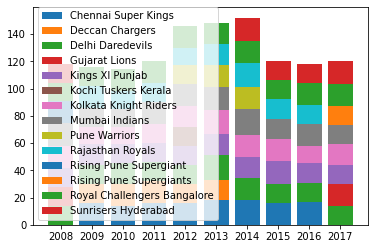

In [261]:
matches_team_season()